In [ ]:
# importing jupyter libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [7]:
# load dataset in csv file
data = pd.read_csv(r'C:\Users\BUYPC COMPUTERS\Downloads\us-states.csv')

Task 1: Data Understanding
    - Dataframe shape
    - Head and tail
    - dytpes
    -Describe

In [10]:
# show the numbers of rows and columns
data.shape

(51, 17)

In [11]:
# show top 5 rows
data.head()

,id,State,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1,Ala.,IV,3,South,6,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2,Alaska,X,4,West,9,Pacific,9
2,3,Arizona,AZ,USA,state,10,current,occupied,NaN,4,Ariz.,IX,4,West,8,Mountain,9
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5,Ark.,VI,3,South,7,West South Central,8
4,5,California,CA,USA,state,10,current,occupied,NaN,6,Calif.,IX,4,West,9,Pacific,9


In [12]:
# show data types
data.dtypes

id                           int64
State                       object
abbreviation                object
country                     object
type                        object
sort                         int64
status                      object
occupied                    object
notes                      float64
fips_state                   int64
assoc_press                 object
standard_federal_region     object
census_region                int64
census_region_name          object
census_division              int64
census_division_name        object
circuit_court               object
dtype: object

In [14]:
# show data basic statistics
data.describe()

,id,sort,notes,fips_state,census_region,census_division
count,51.000000,51.0,0.0,51.000000,51.000000,51.000000
mean,26.000000,10.0,NaN,28.960784,2.666667,5.117647
std,14.866069,0.0,NaN,15.832828,1.051982,2.534932
min,1.000000,10.0,NaN,1.000000,1.000000,1.000000
25%,13.500000,10.0,NaN,16.500000,2.000000,3.000000
50%,26.000000,10.0,NaN,29.000000,3.000000,5.000000
75%,38.500000,10.0,NaN,41.500000,3.500000,7.500000
max,51.000000,10.0,NaN,56.000000,4.000000,9.000000


In [21]:
# dropping irrelevant columns, more than 1 column
data = data[['id', 'State', 
    #  'abbreviation',
      'country', 'type', 'sort', 'status',
       'occupied', 'notes', 'fips_state', 'assoc_press',
       'standard_federal_region', 'census_region', 'census_region_name',
       'census_division', 'census_division_name',
      #'circuit_court'],
      ]].copy()


In [6]:
data.head(2)

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1,Ala.,IV,3,South,6,East South Central,11
1,2,Alaska,AK,USA,state,10,current,occupied,NaN,2,Alaska,X,4,West,9,Pacific,9


In [45]:
# identifying duplicated columns
data.loc[data.duplicated()]

,ID,State,Country,type,sort,status,occupied,fips_state,Asso_Press,standard_federal_region,census_region,census_region_name,census_division,census_division_name


In [40]:
# Renaming columns
data = data.rename(columns = {'id':'ID', 'country': 'Country',
                       'assoc_press':'Asso_Press' })

In [41]:
data.head(1)

,ID,State,Country,type,sort,status,occupied,fips_state,Asso_Press,standard_federal_region,census_region,census_region_name,census_division,census_division_name
0,1,Alabama,USA,state,10,current,occupied,1,Ala.,IV,3,South,6,East South Central


In [38]:
# checking for missing values
data.isnull().sum()

id                         0
State                      0
country                    0
type                       0
sort                       0
status                     0
occupied                   0
fips_state                 0
assoc_press                1
standard_federal_region    0
census_region              0
census_region_name         0
census_division            0
census_division_name       0
dtype: int64

TASK 3 : FEATURES UNDERSTANDING
(Univariate analysis)
    - ploting feature distributions
    - Histogram
    - bar chat
    - KDE
    - boxplot

In [56]:
# unique value in census division
data['census_division'].value_counts()

census_division
5    9
8    8
4    7
1    6
9    5
3    5
6    4
7    4
2    3
Name: count, dtype: int64

Text(0, 0.5, 'count')

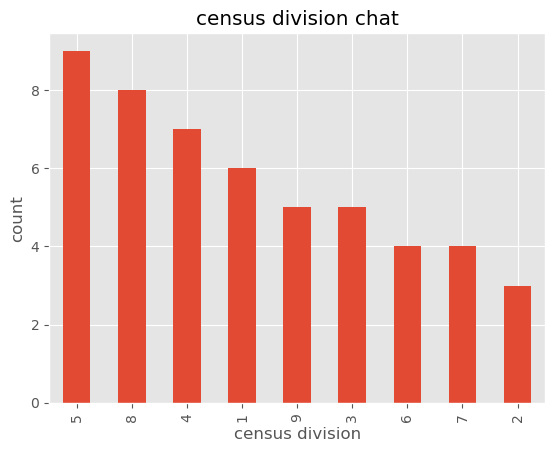

In [55]:
# plot unique value in census division
census = data['census_division'].value_counts().plot(kind='bar', title = 'census division chat')
census.set_xlabel('census division')
census.set_ylabel('count')

<Axes: title={'center': 'census region plot'}, ylabel='Frequency'>

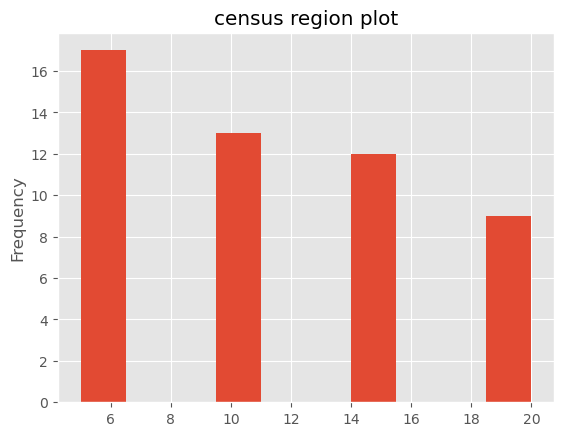

In [63]:
data['census_region'].plot(kind= 'hist', title= 'census region plot')

<Axes: title={'center': 'census region plot'}, ylabel='Density'>

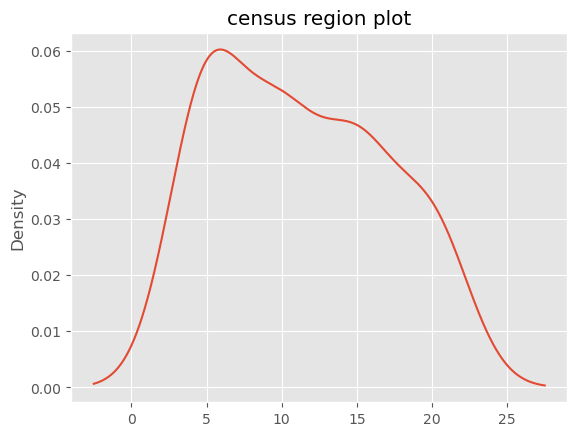

In [62]:
data['census_region'].plot(kind= 'kde', title= 'census region plot')

TASK 4: FEATURE RELATIONSHIP
    - scartterplot
    - heatmap correlation
    - pairplot
    - groupby comparisons

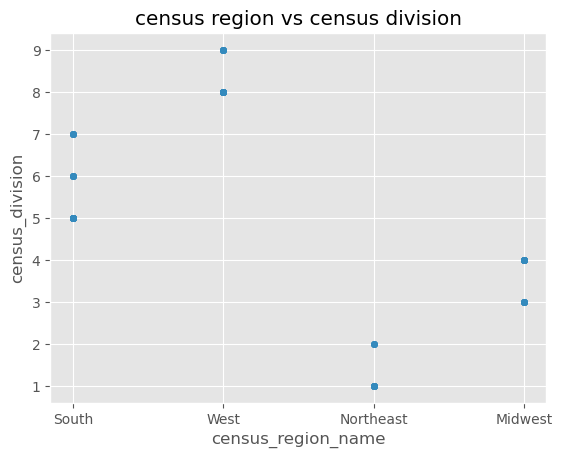

In [76]:
# scattered plot
data.plot(kind= 'scatter', x= 'census_region_name', y= 'census_division', title= 'census region vs census division')
plt.show()

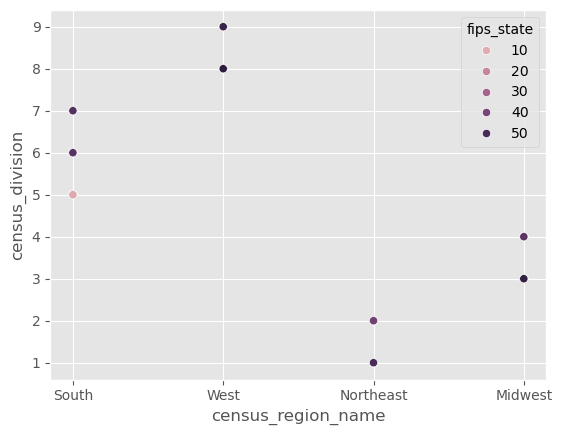

In [79]:
sns.scatterplot(x= 'census_region_name',
               y= 'census_division',
                hue= 'fips_state',
               data= data)
plt.show()

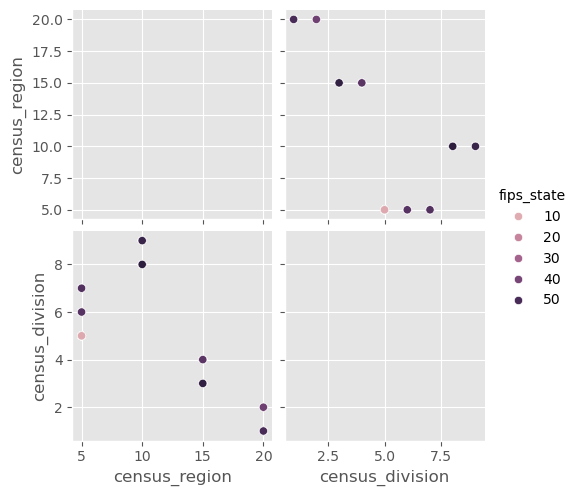

In [86]:
sns.pairplot(data,
            vars = ['census_region',
                    'census_division'],
             hue = 'fips_state')
plt.show()

In [95]:
# drop null value and show the correlation between census region and census division
data_corr = data[['census_region',
    'census_division']].dropna().corr()
data_corr

,census_region,census_division
census_region,1.0,-1.0
census_division,-1.0,1.0


<Axes: >

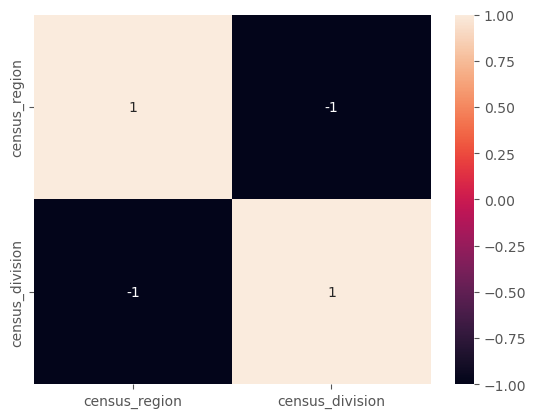

In [92]:
sns.heatmap(data_corr, annot = True)

TASK 5: QUESTION AND ANSWERS 

In [9]:
# How many standard federation region are south
data[data.census_region_name == 'South'].standard_federal_region.value_counts()

IV     8
III    5
VI     4
Name: standard_federal_region, dtype: int64

In [10]:
# display dataset where only census region name are south
data[data.census_region_name == 'South']

,id,name,abbreviation,country,type,sort,status,occupied,notes,fips_state,assoc_press,standard_federal_region,census_region,census_region_name,census_division,census_division_name,circuit_court
0,1,Alabama,AL,USA,state,10,current,occupied,NaN,1,Ala.,IV,3,South,6,East South Central,11
3,4,Arkansas,AR,USA,state,10,current,occupied,NaN,5,Ark.,VI,3,South,7,West South Central,8
7,8,Delaware,DE,USA,state,10,current,occupied,NaN,10,Del.,III,3,South,5,South Atlantic,3
8,9,Florida,FL,USA,state,10,current,occupied,NaN,12,Fla.,IV,3,South,5,South Atlantic,11
9,10,Georgia,GA,USA,state,10,current,occupied,NaN,13,Ga.,IV,3,South,5,South Atlantic,11
16,17,Kentucky,KY,USA,state,10,current,occupied,NaN,21,Ky.,IV,3,South,6,East South Central,6
17,18,Louisiana,LA,USA,state,10,current,occupied,NaN,22,La.,VI,3,South,7,West South Central,5
19,20,Maryland,MD,USA,state,10,current,occupied,NaN,24,Md.,III,3,South,5,South Atlantic,4
23,24,Mississippi,MS,USA,state,10,current,occupied,NaN,28,Miss.,IV,3,South,6,East South Central,5
32,33,North Carolina,NC,USA,state,10,current,occupied,NaN,37,N.C.,IV,3,South,5,South Atlantic,4


In [13]:
# display standard federation region by census region name
data.groupby('standard_federal_region').census_region_name.sum()

standard_federal_region
I       NortheastNortheastNortheastNortheastNortheastN...
II                                     NortheastNortheast
III                    SouthSouthNortheastSouthSouthSouth
IV               SouthSouthSouthSouthSouthSouthSouthSouth
IX                                       WestWestWestWest
V              MidwestMidwestMidwestMidwestMidwestMidwest
VI                               SouthSouthWestSouthSouth
VII                          MidwestMidwestMidwestMidwest
VIII                       WestWestMidwestMidwestWestWest
X                                        WestWestWestWest
Name: census_region_name, dtype: object

In [8]:
# How many unique values are in census region
data.census_region.value_counts()

3    17
4    13
2    12
1     9
Name: census_region, dtype: int64

In [48]:
# change each census region by 5 intervals
data['census_region'] = data['census_region'].map({3: 5, 4: 10, 2: 15, 1: 20})

In [49]:
data.head()

,ID,State,Country,type,sort,status,occupied,fips_state,Asso_Press,standard_federal_region,census_region,census_region_name,census_division,census_division_name
0,1,Alabama,USA,state,10,current,occupied,1,Ala.,IV,5,South,6,East South Central
1,2,Alaska,USA,state,10,current,occupied,2,Alaska,X,10,West,9,Pacific
2,3,Arizona,USA,state,10,current,occupied,4,Ariz.,IX,10,West,8,Mountain
3,4,Arkansas,USA,state,10,current,occupied,5,Ark.,VI,5,South,7,West South Central
4,5,California,USA,state,10,current,occupied,6,Calif.,IX,10,West,9,Pacific


In [50]:
# find the average value of census region
data['census_region'].mean()

11.27450980392157

In [11]:
# show basic statistics of standard federal region by census region
data.groupby('standard_federal_region').census_region.describe()

,count,mean,std,min,25%,50%,75%,max
standard_federal_region,,,,,,,,
I,6.0,20.000000,0.000000,20.0,20.0,20.0,20.00,20.0
II,2.0,20.000000,0.000000,20.0,20.0,20.0,20.00,20.0
III,6.0,7.500000,6.123724,5.0,5.0,5.0,5.00,20.0
IV,8.0,5.000000,0.000000,5.0,5.0,5.0,5.00,5.0
IX,4.0,10.000000,0.000000,10.0,10.0,10.0,10.00,10.0
V,6.0,15.000000,0.000000,15.0,15.0,15.0,15.00,15.0
VI,5.0,6.000000,2.236068,5.0,5.0,5.0,5.00,10.0
VII,4.0,15.000000,0.000000,15.0,15.0,15.0,15.00,15.0
VIII,6.0,11.666667,2.581989,10.0,10.0,10.0,13.75,15.0
